In [116]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [117]:
# Automatic Sprinkler System: Implement FLC to control when and how long a garden sprinkler operates based on soil moisture levels and weather conditions.

# universe variables
x_soil_moisture = np.arange(0, 101, 1) # input 
x_weather_condition = np.arange(0, 101, 1) # input
x_operation_duration = np.arange(0, 21, 1) # output

In [118]:
# define membership functions for Soil Moisture Level
soil_moisture_dry = fuzz.trapmf(x_soil_moisture, [0, 0, 10, 30])
soil_moisture_moist = fuzz.trimf(x_soil_moisture, [30, 60, 90])
soil_moisture_wet = fuzz.trapmf(x_soil_moisture, [60, 80, 100, 100])

In [119]:
# define membership functions for Weather Conditions
weather_sunny = fuzz.trimf(x_weather_condition, [0, 1, 20])
weather_cloudy = fuzz.trimf(x_weather_condition, [20, 40, 60])
weather_rainy = fuzz.trimf(x_weather_condition, [40, 100, 100])

In [120]:
# define membership functions for Sprinkler Operation Duration
operation_short = fuzz.trapmf(x_operation_duration, [0, 0, 5, 10])
operation_medium = fuzz.trimf(x_operation_duration, [6, 11, 15])
operation_long = fuzz.trapmf(x_operation_duration, [16, 16, 20, 20])

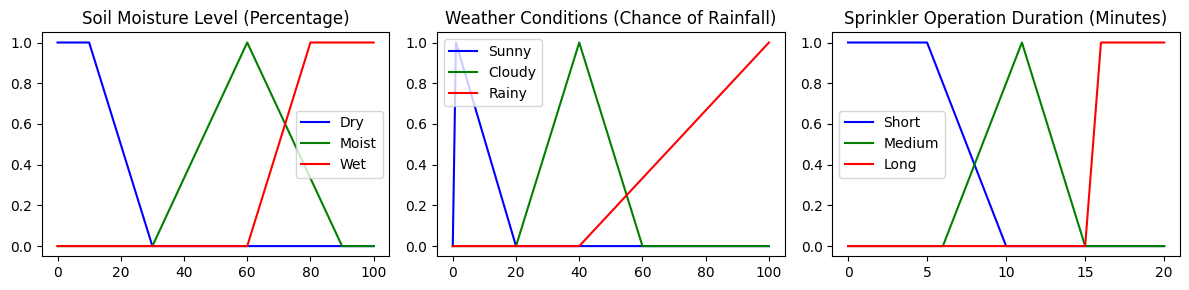

In [121]:
# plotting the membership functions for Soil Moisture Level
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title('Soil Moisture Level (Percentage)')
plt.plot(x_soil_moisture, soil_moisture_dry, 'b', label='Dry')
plt.plot(x_soil_moisture, soil_moisture_moist, 'g', label='Moist')
plt.plot(x_soil_moisture, soil_moisture_wet, 'r', label='Wet')
plt.legend()

# plotting the membership functions for Weather Conditions
plt.subplot(132)
plt.title('Weather Conditions (Chance of Rainfall)')
plt.plot(x_weather_condition, weather_sunny, 'b', label='Sunny')
plt.plot(x_weather_condition, weather_cloudy, 'g', label='Cloudy')
plt.plot(x_weather_condition, weather_rainy, 'r', label='Rainy')
plt.legend()

# plotting the membership functions for Sprinkler Operation Duration
plt.subplot(133)
plt.title('Sprinkler Operation Duration (Minutes)')
plt.plot(x_operation_duration, operation_short, 'b', label='Short')
plt.plot(x_operation_duration, operation_medium, 'g', label='Medium')
plt.plot(x_operation_duration, operation_long, 'r', label='Long')
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
# membership function
def soil_membership_function(soil_moisture_input):
    soil_moisture_membership = {
    'Dry': fuzz.interp_membership(x_soil_moisture, soil_moisture_dry, soil_moisture_input),
    'Moist': fuzz.interp_membership(x_soil_moisture, soil_moisture_moist, soil_moisture_input),
    'Wet': fuzz.interp_membership(x_soil_moisture, soil_moisture_wet, soil_moisture_input) }
    return soil_moisture_membership

def weather_membership_function(weather_condition_input):
    weather_condition_membership = {
    'Sunny': fuzz.interp_membership(x_weather_condition, weather_sunny, weather_condition_input),
    'Cloudy': fuzz.interp_membership(x_weather_condition, weather_cloudy, weather_condition_input),
    'Rainy': fuzz.interp_membership(x_weather_condition, weather_rainy, weather_condition_input) }
    return weather_condition_membership

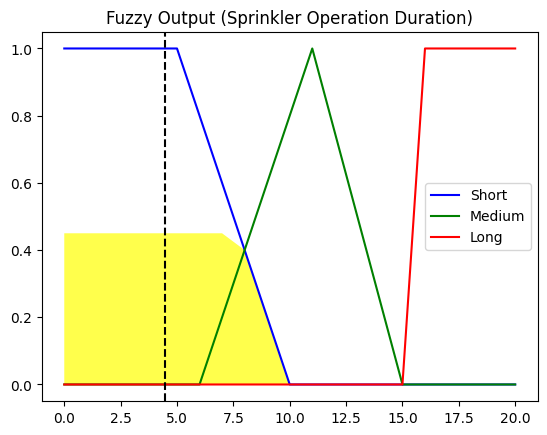

Centroid (Center of Gravity) of Sprinkler Operation Duration: 4.45 (Short)


In [123]:
# user input
soil_moisture_input = float(input("Input Soil Moisture: "))
weather_condition_input = float(input("Input Weather Condition: "))

soil_moisture_membership = soil_membership_function(soil_moisture_input)
weather_condition_membership = weather_membership_function(weather_condition_input)

# Rule 1: IF Soil Moisture is Dry AND Weather is Sunny THEN Sprinkler Operation Duration is Short
rule1 = np.fmin(soil_moisture_membership['Dry'], weather_condition_membership['Sunny'])
operation_duration_rule1 = np.fmin(rule1, operation_short)

# Rule 2: IF Soil Moisture is Dry AND Weather is Cloudy THEN Sprinkler Operation Duration is Short
rule2 = np.fmin(soil_moisture_membership['Dry'], weather_condition_membership['Cloudy'])
operation_duration_rule2 = np.fmin(rule2, operation_short)

# Rule 3: IF Soil Moisture is Dry AND Weather is Rainy THEN Sprinkler Operation Duration is Medium
rule3 = np.fmin(soil_moisture_membership['Dry'], weather_condition_membership['Rainy'])
operation_duration_rule3 = np.fmin(rule3, operation_medium)

# Rule 4: IF Soil Moisture is Moist AND Weather is Sunny THEN Sprinkler Operation Duration is Medium
rule4 = np.fmin(soil_moisture_membership['Moist'], weather_condition_membership['Sunny'])
operation_duration_rule4 = np.fmin(rule4, operation_medium)

# Rule 5: IF Soil Moisture is Moist AND Weather is Cloudy THEN Sprinkler Operation Duration is Medium
rule5 = np.fmin(soil_moisture_membership['Moist'], weather_condition_membership['Cloudy'])
operation_duration_rule5 = np.fmin(rule5, operation_medium)

# Rule 6: IF Soil Moisture is Moist AND Weather is Rainy THEN Sprinkler Operation Duration is Long
rule6 = np.fmin(soil_moisture_membership['Moist'], weather_condition_membership['Rainy'])
operation_duration_rule6 = np.fmin(rule6, operation_long)

# Rule 7: IF Soil Moisture is Wet AND Weather is Sunny THEN Sprinkler Operation Duration is Long
rule7 = np.fmin(soil_moisture_membership['Wet'], weather_condition_membership['Sunny'])
operation_duration_rule7 = np.fmin(rule7, operation_long)

# Rule 8: IF Soil Moisture is Wet AND Weather is Cloudy THEN Sprinkler Operation Duration is Medium
rule8 = np.fmin(soil_moisture_membership['Wet'], weather_condition_membership['Cloudy'])
operation_duration_rule8 = np.fmin(rule8, operation_medium)

# Rule 9: IF Soil Moisture is Wet AND Weather is Rainy THEN Sprinkler Operation Duration is Short
rule9 = np.fmin(soil_moisture_membership['Wet'], weather_condition_membership['Rainy'])
operation_duration_rule9 = np.fmin(rule9, operation_short)

# Combine the output membership functions
aggregated = np.fmax(operation_duration_rule1,
                     np.fmax(operation_duration_rule2,
                             np.fmax(operation_duration_rule3,
                                     np.fmax(operation_duration_rule4,
                                             np.fmax(operation_duration_rule5,
                                                     np.fmax(operation_duration_rule6,
                                                             np.fmax(operation_duration_rule7,
                                                                     np.fmax(operation_duration_rule8,
                                                                             operation_duration_rule9))))))))

# Calculate the centroid (center of gravity) of the aggregated membership function
output_duration = fuzz.defuzz(x_operation_duration, aggregated, 'centroid')

# Plot the resulting membership function for Sprinkler Operation Duration
plt.figure()
plt.plot(x_operation_duration, operation_short, 'b', label='Short')
plt.plot(x_operation_duration, operation_medium, 'g', label='Medium')
plt.plot(x_operation_duration, operation_long, 'r', label='Long')
plt.fill_between(x_operation_duration, 0, aggregated, facecolor='Yellow', alpha=0.7)
plt.title('Fuzzy Output (Sprinkler Operation Duration)')
plt.legend()

# Mark the centroid on the plot
plt.axvline(x=output_duration, color='k', linestyle='--', label='Centroid')

plt.show()
label = ''
if output_duration <= 10:
    label = "Short"
elif output_duration <= 15:
    label = "Medium"
else:
    label = "Long"

print(f"Centroid (Center of Gravity) of Sprinkler Operation Duration: {output_duration:.2f} ({label})")